In [ ]:
# module untuk membaca dataset
import pandas as pd

# module untuk melakukan machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# module untuk membuat plot
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
# membaca dataset menggunakan pandas

df = pd.read_csv('hipoglikemia.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,105,62,35,39,33.6,0.127,47,0
1,0,112,82,31,55,38.2,0.233,23,0
2,0,106,0,0,95,44.2,0.630,31,0
3,0,48,68,42,294,42.3,0.365,24,1
4,1,89,62,41,128,40.7,0.536,21,1


In [ ]:
# mengecek nilai null pada dataset sebelum melakukan proses training
# karena tidak ada data yang null maka bisa langsung melakukan proses training
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# menghapus kolom hasil dan menampilkannya = kelas y
# menyimpan nilai label pada variable y dan menghapus kolom label pada data
y = df.pop('Outcome')
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Outcome, dtype: int64

In [ ]:
# menyimpan nilai atribute pada variable X

X = df
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,105,62,35,39,33.6,0.127,47
1,0,112,82,31,55,38.2,0.233,23
2,0,106,0,0,95,44.2,0.630,31
3,0,48,68,42,294,42.3,0.365,24
4,1,89,62,41,128,40.7,0.536,21


In [ ]:
print('Jumlah kelas 0 =', np.count_nonzero(y == 0))
print('Jumlah kelas 1 =', np.count_nonzero(y == 1))

Jumlah kelas 0 = 1216
Jumlah kelas 1 = 784


In [ ]:
# from imblearn.over_sampling import SMOTE
# x_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [ ]:
# print('Jumlah kelas 0 =', np.count_nonzero(y_resampled == 0))
# print('Jumlah kelas 1 =', np.count_nonzero(y_resampled == 1))

In [ ]:
# random_state = 1

# X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=random_state)

In [ ]:
random_state = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# AdaBoost

In [ ]:
abc_model = AdaBoostClassifier()

In [ ]:
# melakukan training pada data

abc_model.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
# melakukan predict pada data testing

y_pred = abc_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1030,   49],
       [  75,  646]], dtype=int64)

In [ ]:
# melihat akurasi dari penggunaan data training dan testing untuk memprediksi data baru

accuracy_score(y_test, y_pred)

0.9311111111111111

In [ ]:
# mencetak hasil klasifikasi

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1079
           1       0.93      0.90      0.91       721

    accuracy                           0.93      1800
   macro avg       0.93      0.93      0.93      1800
weighted avg       0.93      0.93      0.93      1800



In [ ]:
# test kinerja klasifikasi dengan AdaBoost berdasarkan test size

def model_performance_adaBoost(test_size):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    abc_model.fit(X_train,y_train)

    y_pred = abc_model.predict(X_test)
    
    heading = str(test_size*100)+'%'
    
    print('\n')
    print('<--------------------- Sample test size '+ heading +' --------------------->')
    
    # akurasi
    print('\n')
    print('Akurasi')
    print('======================')
    accuracy = accuracy_score(y_test, y_pred)
    print(str(round(accuracy*100,2))+'%')
            
    print('\n')
    print('Confusion Matrix')
    print('======================')
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

        
    print('\n')
    print('Classification Report')
    print('======================')
    print(classification_report(y_test, y_pred))

In [ ]:
# analisa hasil penggunaan test size dengan mengambil nilai akurasi & performa klasifikasi dari ukuran test size

# cetak hasil performa klasifikasi dengan sampel datasize 10% - 90%
def print_performance():
    for i in range(1,10):
        value = round(i*0.1, 1)
        # value = 0.1, 0.2, 0.3, ...., 0.9
        model_performance_adaBoost(value)

print_performance()



<--------------------- Sample test size 10.0% --------------------->


Akurasi
94.5%


Confusion Matrix
[[108   9]
 [  2  81]]


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       117
           1       0.90      0.98      0.94        83

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



<--------------------- Sample test size 20.0% --------------------->


Akurasi
93.75%


Confusion Matrix
[[223  12]
 [ 13 152]]


Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       235
           1       0.93      0.92      0.92       165

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



<--------------------- Sample test si

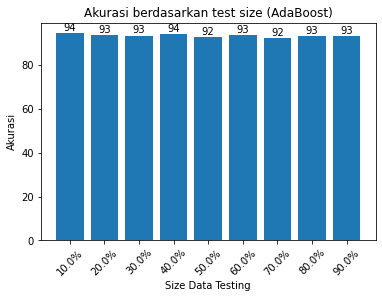

In [ ]:
data_test_size = []
data_akurasi = []

for i in range(1,10):
    test_size = round(i*0.1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    abc_model.fit(X_train,y_train)
    y_pred = abc_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    data_akurasi.append(round(accuracy*100, 2))
    data_test_size.append(str(round(test_size*100, 2))+'%')
    

plot = plt.bar(data_test_size, data_akurasi)

for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
        1.002*height,'%d' % int(height), ha='center', va='bottom')
    
plt.title("Akurasi berdasarkan test size (AdaBoost)")
plt.xlabel("Size Data Testing")
plt.ylabel("Akurasi")
plt.xticks(rotation=45)

# menampilkan plot
plt.show()

# Random Forest

In [ ]:
rfc_model = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# melakukan training pada data

rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# melakukan predict pada data testing

y_pred = rfc_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1062,   17],
       [ 110,  611]], dtype=int64)

In [ ]:
# melihat akurasi dari penggunaan data training dan testing untuk memprediksi data baru

accuracy_score(y_test, y_pred)

0.9294444444444444

In [ ]:
# mencetak hasil klasifikasi

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1079
           1       0.97      0.85      0.91       721

    accuracy                           0.93      1800
   macro avg       0.94      0.92      0.92      1800
weighted avg       0.93      0.93      0.93      1800



In [ ]:
# test kinerja klasifikasi dengan Random Forest berdasarkan test size

def model_performance_randomForest(test_size):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    rfc_model.fit(X_train,y_train)

    y_pred = rfc_model.predict(X_test)
    
    heading = str(test_size*100)+'%'
    
    print('\n')
    print('<--------------------- Sample test size '+ heading +' --------------------->')
    
    # akurasi
    print('\n')
    print('Akurasi')
    print('======================')
    accuracy = accuracy_score(y_test, y_pred)
    print(str(round(accuracy*100,2))+'%')
            
    print('\n')
    print('Confusion Matrix')
    print('======================')
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

        
    print('\n')
    print('Classification Report')
    print('======================')
    print(classification_report(y_test, y_pred))

In [ ]:
# analisa hasil penggunaan test size dengan mengambil nilai akurasi & performa klasifikasi dari ukuran test size

# cetak hasil performa klasifikasi dengan sampel datasize 10% - 90%
def print_performance():
    for i in range(1,10):
        value = round(i*0.1, 1)
        # value = 0.1, 0.2, 0.3, ...., 0.9
        model_performance_randomForest(value)

print_performance()



<--------------------- Sample test size 10.0% --------------------->


Akurasi
93.5%


Confusion Matrix
[[117   0]
 [ 13  70]]


Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       117
           1       1.00      0.84      0.92        83

    accuracy                           0.94       200
   macro avg       0.95      0.92      0.93       200
weighted avg       0.94      0.94      0.93       200



<--------------------- Sample test size 20.0% --------------------->


Akurasi
92.0%


Confusion Matrix
[[232   3]
 [ 29 136]]


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       235
           1       0.98      0.82      0.89       165

    accuracy                           0.92       400
   macro avg       0.93      0.91      0.92       400
weighted avg       0.93      0.92      0.92       400



<--------------------- Sample test siz

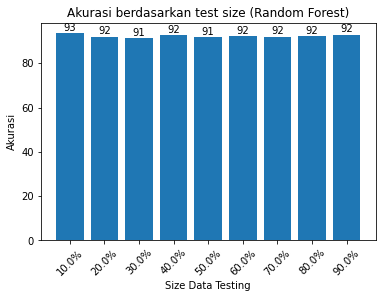

In [ ]:
data_test_size = []
data_akurasi = []

for i in range(1,10):
    test_size = round(i*0.1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    rfc_model.fit(X_train,y_train)
    y_pred = rfc_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    data_akurasi.append(round(accuracy*100, 2))
    data_test_size.append(str(round(test_size*100, 2))+'%')


plot = plt.bar(data_test_size, data_akurasi)

for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
        1.002*height,'%d' % int(height), ha='center', va='bottom')
    
plt.title("Akurasi berdasarkan test size (Random Forest)")
plt.xlabel("Size Data Testing")
plt.ylabel("Akurasi")
plt.xticks(rotation=45)

# menampilkan plot
plt.show()

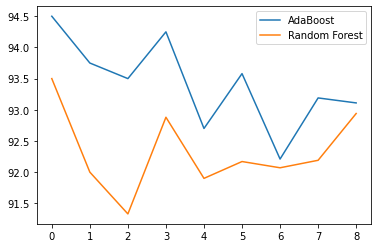

In [ ]:
import matplotlib.pyplot as plt

data_acc_adaBoost = []
data_acc_randomForest = []
data_test_size = []

for i in range(1,10):
  test_size = round(i*0.1, 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  
  abc_model.fit(X_train,y_train)
  y_pred = abc_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  data_acc_adaBoost.append(round(accuracy*100, 2))
  
  rfc_model.fit(X_train,y_train)
  y_pred = rfc_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  data_acc_randomForest.append(round(accuracy*100, 2))
  
  data_test_size.append(str(round(test_size*100, 2))+'%')

plt.plot(data_acc_adaBoost, label='AdaBoost')
plt.plot(data_acc_randomForest, label='Random Forest')

plt.legend()
plt.show()